# Handling Missing Values

Missing values occurs in dataset when some of the informations is not stored for a variable. 

They can arise from various sources, such as data entry errors, equipment malfunctions, or incomplete surveys. 

## Types of Missing Data

1. **Missing Completely at Random (MCAR)**: The missingness is entirely random and not related to any other variable in the dataset.

2. **Missing at Random (MAR)**: The missingness is related to some other observed variable but not the variable with missing values itself.

3. **Missing Not at Random (MNAR)**: The missingness is related to the variable with missing values itself.


In [1]:
import pandas as pd
import seaborn as sns

In [14]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
## Checking Missing Values
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Strategies to Handle Missing Values

### Delete rows with missing values

In [ ]:
df.shape

(891, 15)

In [18]:
df.dropna().shape

(182, 15)

### Columns Wise Delete

In [ ]:
df.shape

(891, 15)

In [20]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values
### 1- Mean Value

<Axes: xlabel='age', ylabel='Count'>

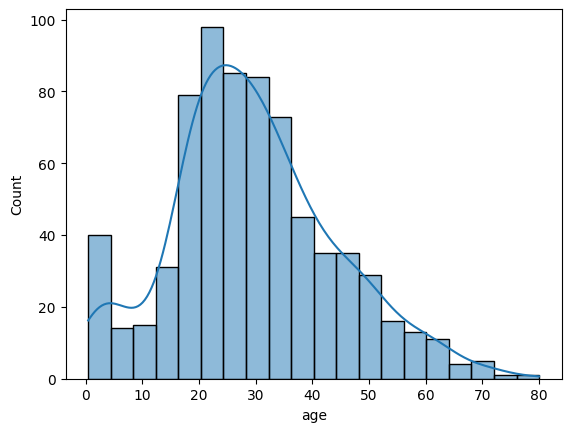

In [ ]:
sns.histplot(df["age"], kde=True)

In [22]:
df['age_mean'] = df['age'].fillna(df['age'].mean())
df[['age', 'age_mean']]

,age,age_mean
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


<Axes: xlabel='age_mean', ylabel='Count'>

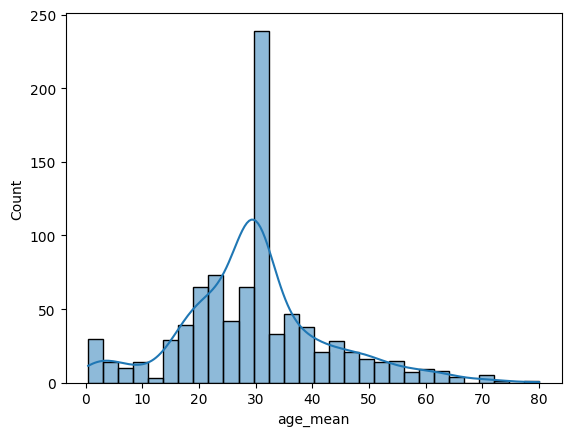

In [23]:
sns.histplot(df["age_mean"], kde=True)

In [24]:
## Mean is not a good choice for imputation when the data is skewed. When we have normal distribution, mean is a good choice.

### Median Value

In [25]:
df["age_median"] = df["age"].fillna(df["age"].median())
df[['age', 'age_mean', 'age_median']]

,age,age_mean,age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


<Axes: xlabel='age_median', ylabel='Count'>

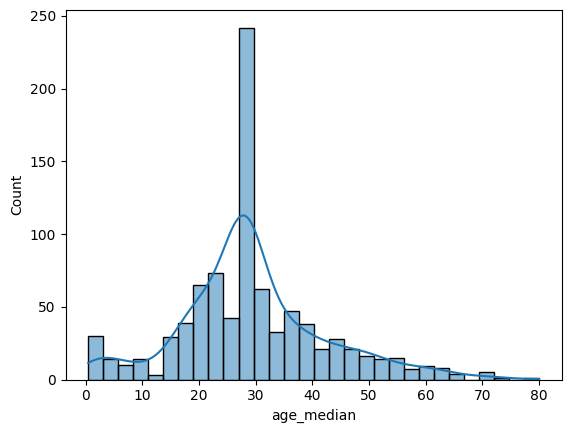

In [26]:
sns.histplot(df["age_median"], kde=True)

### 3- Mode Value--Categorical Features

In [27]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [28]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [29]:
df['embarked'].mode()[0]

'S'

In [30]:
df['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
df["embarked_mode"] = df['embarked'].fillna(df['embarked'].mode()[0])
df[['embarked', 'embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [33]:
print(df['embarked'].isnull().sum())

2


In [34]:
print(df['embarked_mode'].isnull().sum())

0
